<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Exercices Global/Exercices Global/TitanicDataset.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [43]:
#Loading the dataset
data = pd.read_excel('titanic3.xls')

#Print the first 5 rows of the dataframe.
df= data.copy()
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.drop('name',axis=1,inplace=True)

object     7
int64      4
float64    3
dtype: int64

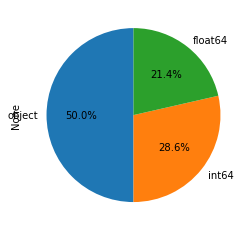

In [38]:
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
df.dtypes.value_counts()


In [9]:
df.isna().sum()

pclass          0
survived        0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [39]:
df.drop(['name','cabin','boat','body','home.dest','ticket'],axis=1,inplace=True)

In [30]:
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [40]:
df['age'].fillna(df['age'].mean(), inplace = True)

df.dropna(1,inplace=True)

In [18]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
dtype: int64

In [19]:
df.shape

(1309, 7)

In [63]:
df= data.copy()
df.drop(['name','cabin','boat','body','home.dest','ticket'],axis=1,inplace=True)
df['age'].fillna(df['age'].mean(), inplace = True)
df.dropna(1,inplace=True)

X= df.drop('survived',1)
y=df['survived']

num_col = X.select_dtypes(exclude=['object']).columns
cat_col = X.select_dtypes(include=['object']).columns



In [64]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer




preprocessor = make_column_transformer((StandardScaler(), ['age']))

                                     

X['age'] =  preprocessor.fit_transform(X)

preprocessor = make_column_transformer((OrdinalEncoder(), ['sex']))

X['sex'] =  preprocessor.fit_transform(X)
        


In [65]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=42, stratify=y)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [67]:
from tqdm import tqdm
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in tqdm(range(len(models))):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
 
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


In [68]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
1,SVM,81.393130,79.330484,8.033847,0.796435,0.774799,0.7225,0.747736
0,Logistic Regreesion,80.152672,75.868946,8.920883,0.777793,0.774286,0.6775,0.722667
4,BernoulliNB,78.435115,76.267806,6.274343,0.765818,0.731383,0.6875,0.708763
2,KNeighbors,76.335878,77.777778,8.561953,0.740710,0.708791,0.6450,0.675393
6,Random Forest,76.049618,75.484330,8.439603,0.748441,0.682152,0.6975,0.689740
7,XGBoost,75.286260,75.484330,9.892124,0.731744,0.689008,0.6425,0.664942
5,Decision Tree,74.332061,72.079772,10.826398,0.728333,0.663342,0.6650,0.664170
3,GaussianNB,74.236641,70.883191,5.988398,0.741914,0.640693,0.7400,0.686775


In [24]:
from sklearn.model_selection import GridSearchCV

grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [70]:
from sklearn.model_selection import ShuffleSplit,StratifiedKFold,LeaveOneOut
lst_1= []
modeles =[]

k=0
for i,j in tqdm(grid_models):
    lst_2= []
    cv =LeaveOneOut()
    grid = GridSearchCV(estimator=i,param_grid = j,scoring='precision',cv = cv)
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(X_test)
   
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = cv)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    modeles.append(model)
    lst_2.append(models[k][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)
    print(lst_2)
    k+=1

 12%|█▎        | 1/8 [00:10<01:10, 10.03s/it]

['Logistic Regreesion', 80.34351145038168, 75.09578544061303, 43.2458270023677, 0.7750308641975309, 0.793939393939394, 0.655, 0.7178082191780822]


 25%|██▌       | 2/8 [00:32<01:23, 13.90s/it]

['SVM', 78.43511450381679, 77.77777777777779, 41.5739709641549, 0.7600771604938271, 0.7471590909090909, 0.6575, 0.6994680851063829]


 38%|███▊      | 3/8 [00:48<01:12, 14.44s/it]

['KNeighbors', 81.48854961832062, 78.9272030651341, 40.782556599954546, 0.7967283950617284, 0.7783783783783784, 0.72, 0.7480519480519481]


 50%|█████     | 4/8 [00:51<00:43, 10.83s/it]

['GaussianNB', 74.23664122137404, 70.49808429118774, 45.6051372149165, 0.7419135802469136, 0.6406926406926406, 0.74, 0.6867749419953597]


 62%|██████▎   | 5/8 [00:56<00:27,  9.09s/it]

['BernoulliNB', 78.43511450381679, 76.24521072796935, 42.55806520325475, 0.7658179012345678, 0.7313829787234043, 0.6875, 0.7087628865979382]


 75%|███████▌  | 6/8 [00:59<00:14,  7.48s/it]

['Decision Tree', 75.0, 72.79693486590038, 44.500559105699956, 0.7356481481481482, 0.6716417910447762, 0.675, 0.6733167082294265]


 88%|████████▊ | 7/8 [08:16<02:16, 136.19s/it]

['Random Forest', 75.76335877862596, 74.32950191570882, 43.68152168289838, 0.7461265432098766, 0.6771844660194175, 0.6975, 0.687192118226601]


100%|██████████| 8/8 [09:26<00:00, 70.85s/it] 

['XGBoost', 74.23664122137404, 76.24521072796935, 42.55806520325475, 0.7227777777777779, 0.6701570680628273, 0.64, 0.6547314578005116]


In [71]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
2,KNeighbors,81.488550,78.927203,40.782557,0.796728,0.778378,0.7200,0.748052
0,Logistic Regreesion,80.343511,75.095785,43.245827,0.775031,0.793939,0.6550,0.717808
1,SVM,78.435115,77.777778,41.573971,0.760077,0.747159,0.6575,0.699468
4,BernoulliNB,78.435115,76.245211,42.558065,0.765818,0.731383,0.6875,0.708763
6,Random Forest,75.763359,74.329502,43.681522,0.746127,0.677184,0.6975,0.687192
5,Decision Tree,75.000000,72.796935,44.500559,0.735648,0.671642,0.6750,0.673317
7,XGBoost,74.236641,76.245211,42.558065,0.722778,0.670157,0.6400,0.654731
3,GaussianNB,74.236641,70.498084,45.605137,0.741914,0.640693,0.7400,0.686775


In [80]:
lst_2=[]
param= {'n_neighbors':range(1,15), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = param,scoring='precision',cv = 20)
grid.fit(X_train, y_train)
model = grid.best_estimator_
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score


lst_2.append((accuracy_score(y_test, y_pred))*100) 
lst_2.append(accuracies.mean()*100)
lst_2.append(accuracies.std()*100)
lst_2.append(roc)
lst_2.append(precision)
lst_2.append(recall)
lst_2.append(f1)

print(lst_2)

[79.77099236641222, 77.03296703296704, 10.249278001556698, 0.7665740740740741, 0.79375, 0.635, 0.7055555555555555]


In [81]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

# for competition

In [38]:
trainSet= pd.read_csv('train.csv',index_col='PassengerId')
TestSet = pd.read_csv('test.csv',index_col='PassengerId')
TestSet.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:

trainSet.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
trainSet['Age'].fillna(trainSet['Age'].mean(), inplace = True)
trainSet.dropna(1,inplace=True)
TestSet.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
TestSet['Age'].fillna(TestSet['Age'].mean(), inplace = True)
TestSet.dropna(1,inplace=True)

X= trainSet.drop('Survived',1)
y=trainSet['Survived']





In [44]:

from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer




preprocessor = make_column_transformer((StandardScaler(), ['Age']))                           
X['Age'] =  preprocessor.fit_transform(X)
preprocessor = make_column_transformer((StandardScaler(), ['Fare']))
X['Fare'] =  preprocessor.fit_transform(X)
preprocessor = make_column_transformer((OrdinalEncoder(), ['Sex']))
X['Sex'] =  preprocessor.fit_transform(X)

preprocessor = make_column_transformer((StandardScaler(), ['Age']))                           
X_test['Age'] =  preprocessor.fit_transform(X_test)
preprocessor = make_column_transformer((StandardScaler(), ['Fare']))
X_test['Fare'] =  preprocessor.fit_transform(X_test)
preprocessor = make_column_transformer((OrdinalEncoder(), ['Sex']))
X_test['Sex'] =  preprocessor.fit_transform(X_test)



In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.9,random_state=42, stratify=y)

In [42]:
lst_2=[]
param= {'n_neighbors':range(1,15), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = param,scoring='precision',cv = 20)
grid.fit(X_train, y_train)
model = grid.best_estimator_
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 20)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
precision = precision_score(y_test, y_pred)  #Precision Score
recall = recall_score(y_test, y_pred)  #Recall Score
f1 = f1_score(y_test, y_pred)  #F1 Score


lst_2.append((accuracy_score(y_test, y_pred))*100) 
lst_2.append(accuracies.mean()*100)
lst_2.append(accuracies.std()*100)
lst_2.append(roc)
lst_2.append(precision)
lst_2.append(recall)
lst_2.append(f1)

print(lst_2)

[76.43391521197007, 73.75, 20.968726713846976, 0.7567498291182502, 0.6819571865443425, 0.724025974025974, 0.7023622047244094]


In [46]:
X_test


,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
203,3,1.0,0.351305,0,0,-0.512060
599,3,1.0,0.019486,0,0,-0.497766
307,1,0.0,0.019486,0,0,1.534146
482,2,1.0,0.019486,0,0,-0.639391
181,3,0.0,0.019486,8,2,0.723930
...,...,...,...,...,...,...
408,2,1.0,-2.040388,1,1,-0.271853
769,3,1.0,0.019486,1,0,-0.166002
37,3,1.0,0.019486,0,0,-0.497684


In [53]:
y_pred = model.predict(X_test)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
203,3,1.0,0.351305,0,0,-0.512060
599,3,1.0,0.019486,0,0,-0.497766
307,1,0.0,0.019486,0,0,1.534146
482,2,1.0,0.019486,0,0,-0.639391
181,3,0.0,0.019486,8,2,0.723930
...,...,...,...,...,...,...
408,2,1.0,-2.040388,1,1,-0.271853
769,3,1.0,0.019486,1,0,-0.166002
37,3,1.0,0.019486,0,0,-0.497684


In [50]:
sub = {'PassengerId': X_test.index,'Survived': y_pred }
sub = pd.DataFrame(data=sub)

In [54]:
sub.to_csv('submission.csv', index = False)